In [2]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
### open the image (PLACE YOUR OWN IMAGE HERE)
image_org = Image.open("/content/drive/MyDrive/IMP301/PT3/images/2.png")

In [5]:
def rgb2gray(rgb):
    if(len(rgb.shape) == 3):
        return np.uint8(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]))
    else:#already a grayscale
        return rgb

In [6]:
image = np.array(image_org)

In [7]:
grayscale_image = rgb2gray(image) #outputs a grayscaled image

In [8]:
### Adaptive Median Filtering...

In [9]:
def calculate_median(array):
    """Return the median of 1-d array"""
    sorted_array = np.sort(array) #timsort (O(nlogn))
    median = sorted_array[len(array)//2]
    return median

In [10]:
def level_A(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_med < z_max):
        return level_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
    else:
        S_xy += 2 #increase the size of S_xy to the next odd value.
        if(S_xy <= S_max): #repeat process
            return level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else:
            return z_med

In [11]:
def level_B(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_xy < z_max):
        return z_xy
    else:
        return z_med

In [12]:
def amf(image, initial_window, max_window):
    """runs the Adaptive Median Filter proess on an image"""
    xlength, ylength = image.shape #get the shape of the image.
    
    z_min, z_med, z_max, z_xy = 0, 0, 0, 0
    S_max = max_window
    S_xy = initial_window #dynamically to grow
    
    output_image = image.copy()
    
    for row in range(S_xy, xlength-S_xy-1):
        for col in range(S_xy, ylength-S_xy-1):
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1] #filter window
            target = filter_window.reshape(-1) #make 1-dimensional
            z_min = np.min(target) #min of intensity values
            z_max = np.max(target) #max of intensity values
            z_med = calculate_median(target) #median of intensity values
            z_xy = image[row, col] #current intensity
            
            #Level A & B
            new_intensity = level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
            output_image[row, col] = new_intensity
    return output_image

In [13]:
output = amf(grayscale_image, 3, 11)

# Using Adaptive Median Filter

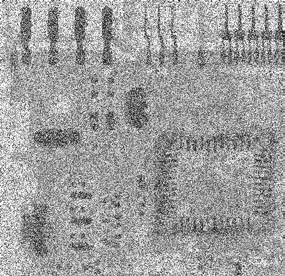

In [14]:
Image.fromarray(output)

# Original Image (converted to grayscale)

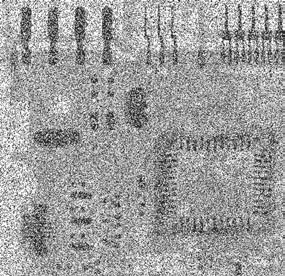

In [15]:
Image.fromarray(grayscale_image)

## Output with Python's native Median Filter function

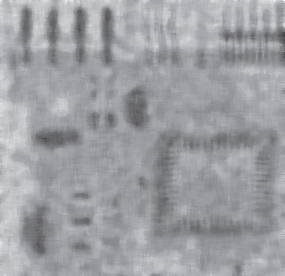

In [28]:
native_output = image_org.filter(ImageFilter.MedianFilter(size = 9))
native_output

In [17]:
deviation_native = np.sqrt(np.sum(np.square(grayscale_image-np.array(rgb2gray(np.array(native_output))))))

In [18]:
deviation_original = np.sum(np.square(grayscale_image-np.array(output)))

In [19]:
print("Deviation from the original salt and pepper images:")
print("Deviation via Median Filter (built-in): ", deviation_native)
print("Deviation via Adaptive Median Filter: ", deviation_original)
print(f"Percent difference b/w deviations: {100*(deviation_original - deviation_native)/deviation_original}%")

Deviation from the original salt and pepper images:
Deviation via Median Filter (built-in):  2630.561917157625
Deviation via Adaptive Median Filter:  384865
Percent difference b/w deviations: 99.31649749466499%


### As shown from the above print, AMF results in almost twice as higher deviation than the native median filter technique.

In [20]:
### Thereofore, the built-in technique is nowhere as good as compared to the Adaptive Median Filter technique.